## Matricule & noms : 
`David-Olivier Roy - xxx`
  
`Amine Melbouci    - xxx`  
  
`Marc-Antoine Huet - xxx`

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 4 </center>
<h3> <center> Analyse multirésolution et transformée de ondelettes</center></h3>
<center>Hiver 2021 </center>



Assurez-vous de renseigner tout endroit où il est écrit `Inscrivez votre code ici ` or `DOUBLE-CLIQUEZ POUR INSCRIVE VOTRE RÉPONSE`.

<br></br>    

Ce travail pratique est consacré à l’un des principaux outils utilisés en analyse multirésolution de signaux ou d’images numériques : la transformée en ondelettes rapide. Les tâches demandées vous permettront de vous familiariser avec cet outil et de l’utiliser dans un but précis : la correction de défauts localisés dans une image.


Les fonctions Python et les données à utiliser pour effectuer ce travail pratique se trouvent dans l’archive <I>TP4.zip</I> disponible sur le site web du cours.

<b>Pondération</b> 
   - Transformée en ondelettes rapide d’une image : 8 pts
   - Correction de défauts localisés : 10 pts
   - Qualités de la langue et du rapport : 2 pts  
<b>Total : 20 points</b> 
    
    
**Date de remise**
   - Groupe 1: 4 avril 23h59
   - Groupe 2: 11 avril 23h59


## Transformée en ondelettes rapide avec Python.
    
On rappelle que prendre la transformée en ondelettes rapide (TOR) 2D d’une image consiste à la décomposer en quatre éléments dont la taille est sensiblement le quart de celle de l’image originale. Trois de ces éléments sont les coefficients de détail (respectivement horizontal, diagonal et vertical) et le quatrième élément est l’approximation de l’image originale à l’échelle immédiatement supérieure. Cette décomposition est équivalente à un codage en sous-bandes 2D, les coefficients de détail correspondant aux fréquences hautes et l’approximation aux fréquences basses. Le processus de décomposition peut être itéré sur l’approximation pour obtenir une décomposition multiéchelles ou espace-échelle. Pour effectuer une telle décomposition, les paramètres à spécifier sont l’ondelette (ou la fonction d’échelle) utilisée et le nombre de niveaux de décomposition (ou le nombre d’échelles).
      
    

La boîte à outils « pywt (PyWavelets) » de Python fournit plusieurs fonctions permettant de calculer et de manipuler la TOR d’un signal ou d’une image. Les coefficients de la TOR sont retournés dans le format suivant: [cAn, (cHn, cVn, cDn), … (cH1, cV1, cD1)] où n est le niveau de résolution, A est l'approximation de l'image originale, H est le coefficient de détails horizontal, V est le coefficient de détails vertical et D le coefficient de détails diagonal. Dans le cadre de ce travail pratique, les fonctions suivantes présentent un intérêt particulier :


| Fontion  | La description |
|:------:|:------:|
| Wavelet  | Permet d'accéder, grâce à leurs noms, aux différentes ondelettes |
| Wavelet.filter_bank | Calcul des filtres de codage-décodage en sous-bandes correspondant à une ondelette donnée |
| wavedec2 | Calcul de la TOR 2D |
| waverec2 | Calcul de la TOR 2D inverse |

Pour plus d'information sur l'utilisation de ces fonctions, consultez la documentation pour [Wavelet](https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html) et pour [wavedec2 et waverec2](https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html).
De plus, plusieurs fonctions permettant de manipuler et d’afficher les éléments d’une TOR 2D sont fournies. Le tableau suivant en donne une description succincte :

| Fontion  | La description |
|:------:|:------:|
| waveextract | Extraction d’un élément d’une structure TOR 2D |
| waveinsert | Insertion d’un élément dans une structure TOR 2D |
| wave2gray | Affichage pyramidal d’une structure TOD 2D |

Dans ce travail pratique, on n’utilisera que deux types d’ondelettes : les ondelettes de Daubechies (db<b>x</b>) et les ondelettes symétriques (sym<b>x</b>). Dans la désignation des ondelettes, <b>x</b> représente leur taille, qui est égale à la moitié de la longueur du support des filtres de codage-décodage en sous-bandes. De plus, l’ondelette db1 représente l’ondelette de Haar.


In [356]:
# Installation de PyWavelets la librairie d'ondelettes de Python
import sys
!{sys.executable} -m pip install PyWavelets

In [357]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imread
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 10)

In [358]:
# Fonctions utiles pour manipuler les ondelettes

def wave2gray(coefficients, text=""):
    """Affichage pyramidale d'une structure TOR 2D
     Image W:   ------- ------ ------------ -------------------
                |      |      |            |
                | a(n) | h(n) |            |
                |      |      |            |
                ------- ------     h(n-1)  |
                |      |      |            |
                | v(n) | d(n) |            |        h(n-2)
                |      |      |            |
                ------- ------ ------------
                |             |            |        
                |             |            |
                |             |            |
                |    v(n-1)   |   d(n-1)   |
                |             |            |
                |             |            |
                |             |            |
                -------------- ------------ -------------------
                |                          |
                |          v(n-2)          |        d(n-2) 
                |                          |
    
    coefficients (list): Coeffecients d'une TOR. Les coefficients renvoyés par la fonction `wavedec2` 
        peuvent être directement utilisés comme valeur d'entrée.
     
    """
    # coeffs: [cAn, (cHn, cVn, cDn), … (cH1, cV1, cD1)]
    an = coefficients[0]
    wavelets_display = an
    

    for coeff in coefficients[1:]:
        hn, vn, dn = coeff

        padding = wavelets_display.shape[0] - hn.shape[0]
        pad_y = padding // 2
        pad_x = padding - pad_y

        pad_coeff = []
        for c in [hn, vn, dn]:
            pad_coeff.append(np.pad(c, (pad_y, pad_x), 'constant', constant_values=(1, 1)))

        hn, vn, dn = pad_coeff
        wavelets_display_hn = np.concatenate([wavelets_display, hn], axis=1)
        vn_dn = np.concatenate([vn, dn], axis=1)
        wavelets_display_hn_vn_dn = np.concatenate([wavelets_display_hn, vn_dn], axis=0)
        wavelets_display = wavelets_display_hn_vn_dn

    fig, ax  = plt.subplots(1,1)
    ax.imshow(wavelets_display, cmap='gray')
    ax.set_title("Représentation pyramidale d'une structure TOR 2D" + text)
    ax.axis('off')
    fig.set_size_inches(15,15)


def waveextract(coeffs, direction, level=0):
    """Extrait le coefficient spéficifié par les paramètres.
    
    coeffs (list): Coefficients des ondelettes.
    level (int): Niveau du coefficient à extraire.
    direction (str): Direction du coefficient à extraire. Choix: 'a', 'h', 'v' ou 'd'.
        'a': Approximation de l'image originale
        'h': Coefficient de détails horizontal
        'v': Coefficient de détails vertical
        'd': Coefficient de détails diagonal
    
    """
    if direction == 'a':
        return coeffs[0]

    dir_dict = {'h': 0, 'v': 1, 'd': 2}
    return coeffs[level][dir_dict[direction]]
    

def waveinsert(coefficients, coeff_to_insert, direction, level=0):
    """Insérer le coefficient donné à l'endroit spécifié par les paramètres.
    
    coefficients (list): Coefficients des ondelettes.
    coeff_to_insert (ndarray): Coefficient à insérer dans coeffs.
    level (int): Niveau du coefficient à insérer.
    direction (str): Direction du coefficient à insérer. Choix: 'a', 'h', 'v' ou 'd'.
        'a': Approximation de l'image originale
        'h': Coefficient de détails horizontal
        'v': Coefficient de détails vertical
        'd': Coefficient de détails diagonal
    """
    coeffs = coefficients.copy()
    if direction == 'a':
        coeffs[0] = coeff_to_insert
        return coeffs
    
    dir_dict = {'h': 0, 'v': 1, 'd': 2}
    h_v_d = []
    for d, c in enumerate(coeffs[level]):
        if dir_dict[direction] == d:
            c = coeff_to_insert
        h_v_d.append(c)
    coeffs[level] = tuple(h_v_d)
    return coeffs
    


## 1. Transformée en ondelettes rapide d’une image (8 pts)
### 1.1. Transformée directe et transformée inverse (4 pts)
Dans un premier temps, on utilise l’ondelette de Haar (db1).

<div class="alert alert-block alert-warning">
1.1.1. Représentez graphiquement la réponse impulsionnelle des filtres de codage-décodage en sous-bandes relatifs à cette ondelette. Pour vous aider, consulter la documentation <a href="https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html">ici</a>. </div>

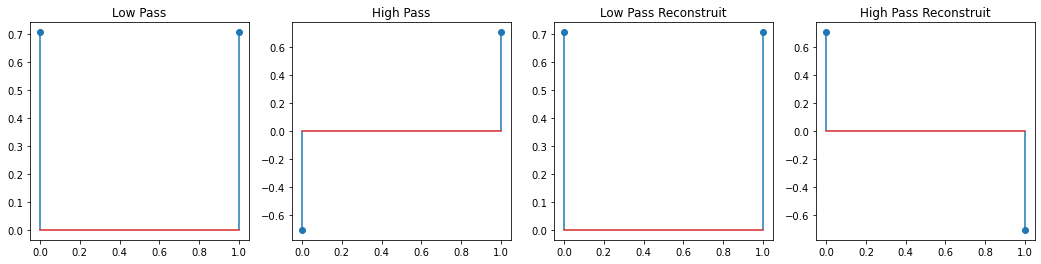

In [359]:
filt = pywt.Wavelet('db1').filter_bank
filt_title = ["Low Pass", "High Pass", "Low Pass Reconstruit", "High Pass Reconstruit"]

fig, ax = plt.subplots(1,4)
for idx, (fil, title) in enumerate(zip(filt, filt_title)):
    ax[idx].stem(fil)
    ax[idx].set_title(title)
fig.set_size_inches(18,4)

<div class="alert alert-block alert-warning">
1.1.2. Effectuez et représentez la transformée en ondelettes rapide (TOR) de l’image Lenna.tif en utilisant trois niveaux d’échelle. </div>

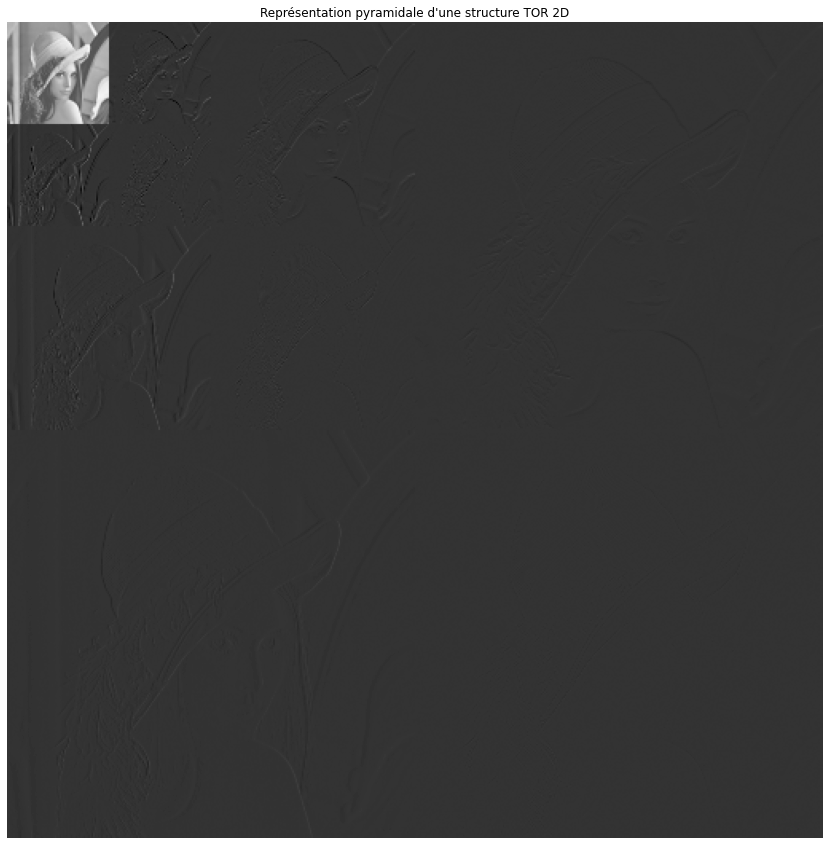

In [360]:
img=plt.imread('Lenna.tif')

waveletdb1 = pywt.Wavelet('db1') 
coeffsdb1 = pywt.wavedec2(img, waveletdb1, level=3)
wave2gray(coeffsdb1)

<div class="alert alert-block alert-warning">
1.1.3. Effectuez ensuite la TOR inverse et vérifiez que l’image reconstruite est identique à l’image originale aux erreurs numériques près. </div>

Erreur quadratique moyenne
db1: 9.740e-27


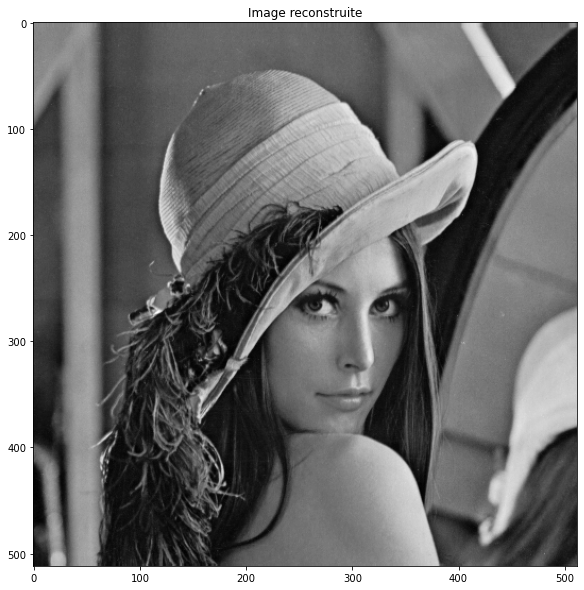

In [361]:
imgRecdb1=pywt.waverec2(coeffsdb1,'db1')
plt.imshow(imgRecdb1, cmap='gray')
plt.title('Image reconstruite')

x, y = img.shape
n = x*y  # Nb de pixels
print("Erreur quadratique moyenne")

Errdb1 = (1/n)*(np.sum((img.astype("float")-imgRecdb1.astype("float"))**2))
print("db1: %.3e"% Errdb1)

Répétez les mêmes opérations (1.1.1. à 1.1.3) avec l’ondelette db4 aux questions 1.1.4 à 1.1.6.

<div class="alert alert-block alert-warning">
1.1.4. Représentez graphiquement la réponse impulsionnelle des filtres de codage-décodage en sous-bandes relatifs à cette ondelette. </div>

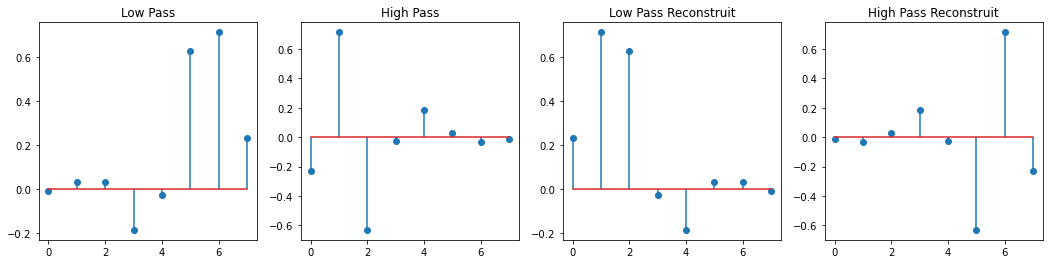

In [362]:
filt = pywt.Wavelet('db4').filter_bank
filt_title = ["Low Pass", "High Pass", "Low Pass Reconstruit", "High Pass Reconstruit"]

fig, ax = plt.subplots(1,4)
for idx, (fil, title) in enumerate(zip(filt, filt_title)):
    ax[idx].stem(fil)
    ax[idx].set_title(title)
fig.set_size_inches(18,4)

<div class="alert alert-block alert-warning">
1.1.5. Effectuez et représentez la transformée en ondelettes rapide (TOR) de l’image Lenna.tif en utilisant trois niveaux d’échelle. </div>

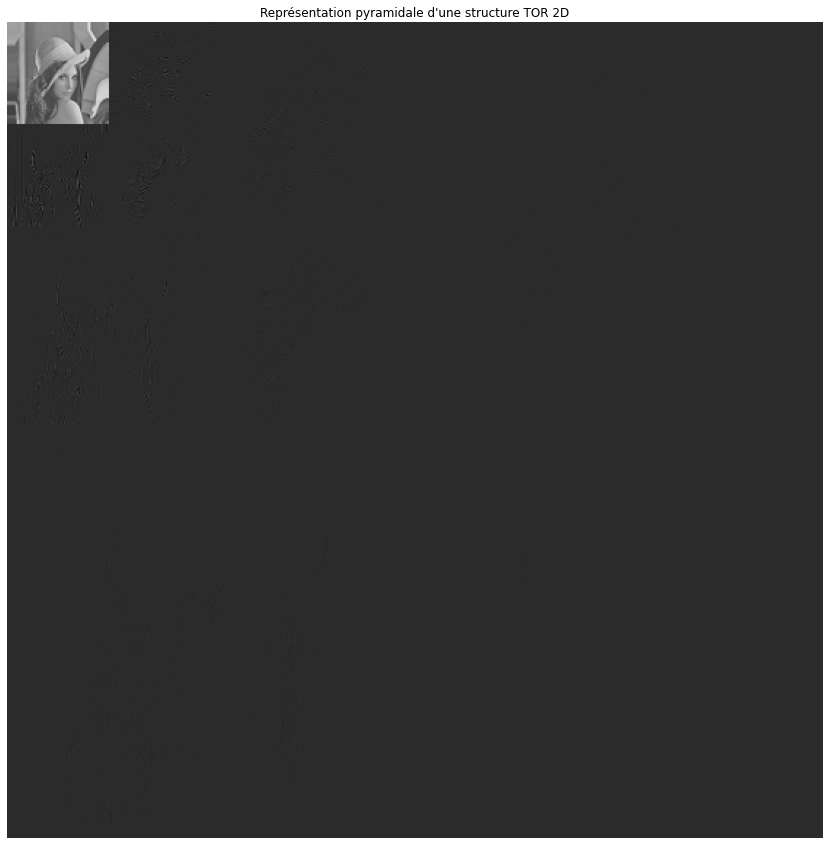

In [363]:
waveletdb4 = pywt.Wavelet('db4') 
coeffsdb4 = pywt.wavedec2(img, waveletdb4, level=3)
wave2gray(coeffsdb4)

<div class="alert alert-block alert-warning">
1.1.6. Effectuez ensuite la TOR inverse et vérifiez que l’image reconstruite est identique à l’image originale aux erreurs numériques près. </div>

Erreur quadratique moyenne
db1: 3.064e-27


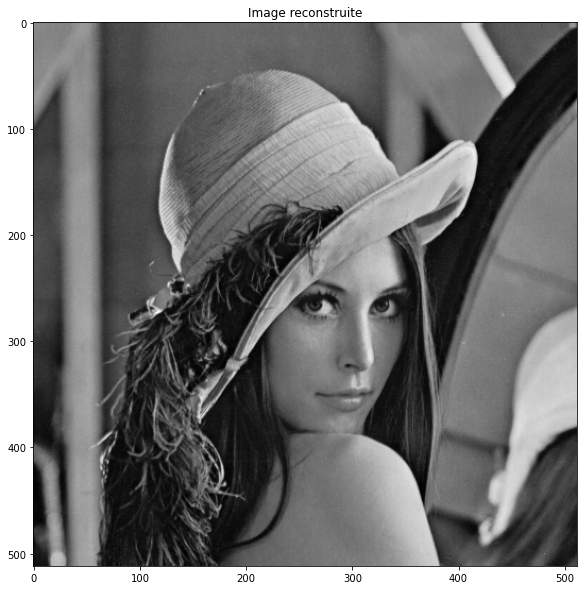

In [364]:
imgRecdb4=pywt.waverec2(coeffsdb4,'db4')
plt.imshow(imgRecdb4, cmap='gray')
plt.title('Image reconstruite')

x, y = img.shape
n = x*y  # Nb de pixels
print("Erreur quadratique moyenne")
Errdb4 = (1/n)*(np.sum((img.astype("float")-imgRecdb4.astype("float"))**2))
print("db1: %.3e"% Errdb4)

<div class="alert alert-block alert-warning">
1.1.7. Comparez les erreurs numériques des images obtenues avec la TOR inverse des ondelettes db1 et db4. Que constatez-vous? </div>

<div class="alert alert-block alert-success"> 
Les valeurs sont causées par des erreurs numériques. Elle sont donc nulles. Les reconstructions sont identiques à l'image originale. </div>

### 1.2. Utilisation des ondelettes pour la compression (4 pts)

Une approche simple de la compression d’image consiste à mettre à zéro les coefficients de détail dont la valeur absolue est inférieure à un seuil donné.

<b>Remarque :</b> Pour effectuer l’opération de seuillage des coefficients, vous pourrez utiliser `waveextract` et `waveinsert` pour extraire les coefficients de détails (avec `waveextract`), appliquer un seuillage sur les coefficients extraits et remplacer les coefficients de détails par ceux seuillés (`waveinsert`).
    
<br></br>
<div class="alert alert-block alert-warning">
1.2.1. Effectuez cette opération avec l’image et les ondelettes utilisées à la section précédente (soient l’image Lenna.tif et les ondelettes Haar & db4). </div>

In [365]:
def compress (coeff, position='a', level=3, thresholdValue=500):
    modif = 0
    coef_cmp = waveextract(coeff, position, level)
    nb_coeff = coef_cmp.shape[0]*coef_cmp.shape[1]

    for i in range(coef_cmp.shape[0]):
        for j in range(coef_cmp.shape[1]):
            if (coef_cmp[i][j] < thresholdValue):
                coef_cmp[i][j] = 0
                modif = modif + 1
    coef_ins = waveinsert(coeff, coef_cmp, position, level)
    return coef_ins, modif, nb_coeff

In [366]:
coeff_cmpdb1, modif_cmpdb1, nb_cmpdb1 = compress(coeffsdb1)
coeff_cmpdb4, modif_cmpdb4, nb_cmpdb4 = compress(coeffsdb4)

<div class="alert alert-block alert-warning">
1.2.2. Effectuez la TOR inverse des coefficients ainsi modifiés  
</div>

Text(0.5, 1.0, 'Image compressée - db4')

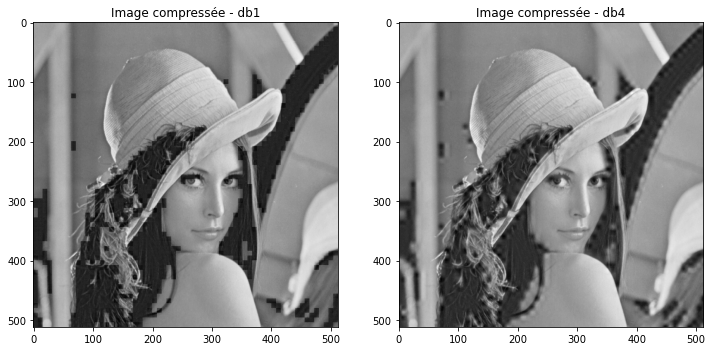

In [367]:
img_cmpdb1 = pywt.waverec2(coeff_cmpdb1, 'db1')
plt.subplot(1,2,1)
plt.imshow(img_cmpdb1, cmap='gray')
plt.title("Image compressée - db1")


img_cmpdb4 = pywt.waverec2(coeff_cmpdb4, 'db4')
plt.subplot(1,2,2)
plt.imshow(img_cmpdb4, cmap='gray')
plt.title("Image compressée - db4")

<div class="alert alert-block alert-warning">
1.2.3. Évaluez l’erreur quadratique normalisée entre l’image de départ 𝐼(𝑥, 𝑦) et l’image
reconstruite 𝐼′(𝑥, 𝑦).
    
<b>Remarque:</b> L’erreur quadratique normalisée est définie par :
$$ RMS = \sqrt{ \frac { \sum_{x,y} [I(x,y)-I'(x,y)]^{2}}{ N }} $$
    
<I> N </I> représsente le nombre de pixels dans l'image. </div>

In [368]:
def RMS(img, img_p):
    x, y = img.shape
    n = x*y  # Nb de pixels
    return  np.sqrt(np.sum((np.abs(img-img_p))**2)*(1/n))

In [369]:
Err_cmpdb1 = RMS(img, img_cmpdb1)
Err_cmpdb4 = RMS(img, img_cmpdb4)

print("RMS")
print("db1: %.3f"% Err_cmpdb1)
print("db4: %.3f"% Err_cmpdb4)

RMS
db1: 20.542
db4: 20.213


<div class="alert alert-block alert-warning">
1.2.4. Évaluez le « taux de compression approché » défini comme le rapport entre nombre
de coefficients mis à zéro et le nombre total de coefficients de la TOR. </div>

In [370]:
tx_cmpdb1 = modif_cmpdb1 / nb_cmpdb1 *100
tx_cmpdb4 = modif_cmpdb4 / nb_cmpdb4 *100

print("Taux de compression approché:")
print("db1: %.1f"% tx_cmpdb1, '%')
print("db4: %.1f"% tx_cmpdb4, '%')

Taux de compression approché:
db1: 20.3 %
db4: 20.1 %


<div class="alert alert-block alert-warning">
1.2.5. Commentez brièvement vos résultats ainsi que l’allure des images compressées. </div>

<div class="alert alert-block alert-success"> 
En compressant les images avec un seuil de 500, l'erreur quadratique normalisée et le taux de compression approché pour db1 et db4 sont respectivement: 20.5 et 20.3%, ainsi que 20.2 et 20.1%. En éliminant certains coefficients, l'image reconstruite a alors perdu une partie de son information. L'allure des images compressées sont alors moins belles que l'original. </div>

## 2. Correction de défauts localisés (10 pts)
Les coefficients de la transformée en ondelettes d’une image sont liés aux caractéristiques de cette image à une position et une échelle données. Ces propriétés peuvent être utilisées pour corriger des défauts localisés tels que les rayures qui peuvent affecter les photographies argentiques. Le but de cette partie est de corriger des défauts de ce type, qui seront représentés par des segments de droite d’intensité maximale placés dans une position connue de l’image.

### 2.1. Restauration de l'image (4 pts)

Écrivez une fonction permettant de mettre à zéro (nommé `set_to_zero`) les éléments d’un tableau situés à une distance inférieure à une valeur δ d’un segment de droite AB, les coordonnées des points A et B étant spécifiées en proportion des dimensions de la matrice à laquelle ils appartiennent.


<b>Remarque :</b> On rappelle que la distance d d’un point M de coordonnées (x,y) à la droite passant par les points A et B de coordonnées respectives (x1,y1) et (x2,y2) a pour expression :

$$ d = \frac{|x(y_2 − y_1) − y(x_2 − x_1) − (x_1y_2 − x_2y_1)|}{ \sqrt{(y_2 − y_1)^2 + (x_2 − x_1)^2}} $$

In [267]:
def set_to_zero(img, delta, line_coord):
    """ Met à zero les pixels à une distante delta ou moins de la ligne définie
    
    img (ndarray): Image à modifier.
    delta (float): Distance seuil de la ligne où les valeurs seront mises à zéro.
        La distance delta doit être entre 0 et 1 et représente une proportion de la grandeur de l'image
    line_coord (list): Liste des coordonnées des deux points par lesquels passe la droite en proportion
        des dimensions de l'image (entre 0 et 1).
        Les coordonnées doivent être présentées dans le format [Ay, Ax, By, Bx]
    
    """
    taille_img = img.shape[0]
    xyvalues = range(taille_img)
    yy, xx = np.meshgrid(xyvalues, xyvalues)
    y1, x1, y2, x2 = [coord*taille_img - 1 for coord in line_coord]
    
    num = abs(xx * (y2 - y1) - yy * (x2 - x1) - (x1*y2 - x2*y1))
    denum = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    d = num / denum
    
    img_modif = np.copy(img)
    img_modif[d <= delta*taille_img] = 0
    
    return img_modif

<div class="alert alert-block alert-warning">
2.1.1. Calculez et représentez la transformée en ondelettes de l’image Lenna_r.tif avec l’ondelette db4. </div>

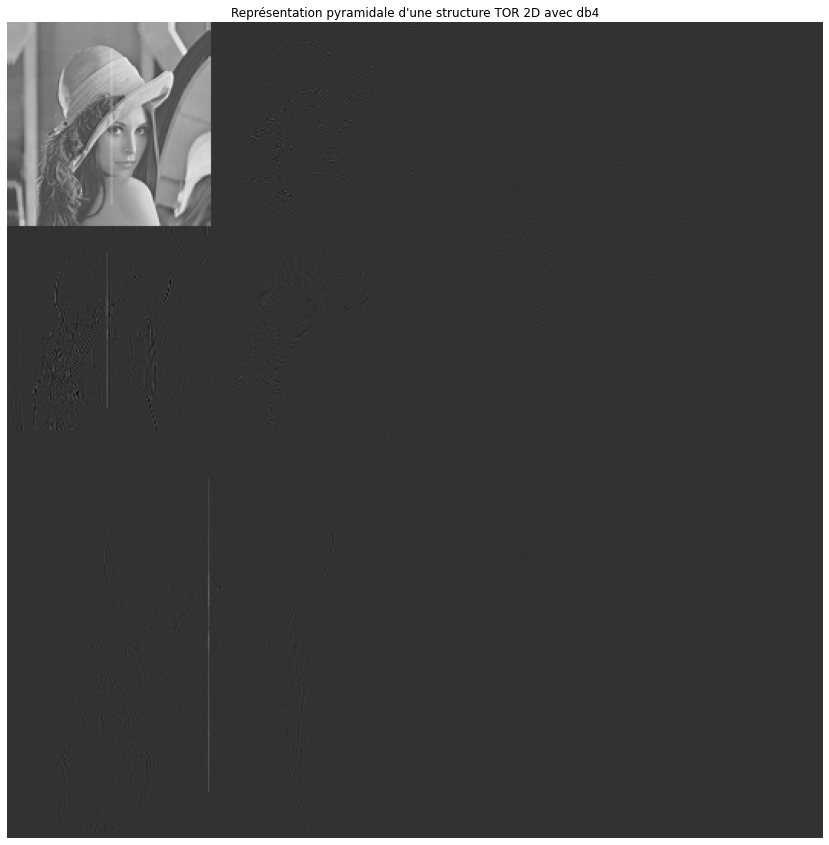

In [268]:
# TOR avec db4
lenna_r = plt.imread('Lenna_r.tif')
coeffs_db4_r = pywt.wavedec2(lenna_r, pywt.Wavelet('db4') , level=2)
wave2gray(coeffs_db4_r, " avec db4")

<div class="alert alert-block alert-warning">
2.1.2. À l’aide de la fonction que vous venez de développer, `set_to_zero`, mettez à zéro les coefficients de détail que vous pouvez associer à la présence du défaut.

<b>Remarque :</b> Les extrémités du défaut affectant l’image Lenna_r.tif ont les coordonnées suivantes : A = (0.1, 0.5) et B = (0.9, 0.5). </div>

In [269]:
def set_to_zero2(coeffs, delta, line_coord, direction):
    """
    Applique set_to_zero à tous les niveaux de la TOR, dans la direction verticale
    """
    for level, _ in enumerate(coeffs):
        if level != 0:
            coeffs_to_add = set_to_zero(waveextract(coeffs, direction, level), delta, line_coord)
            coeffs = waveinsert(coeffs, coeffs_to_add, direction, level)
    
    return coeffs

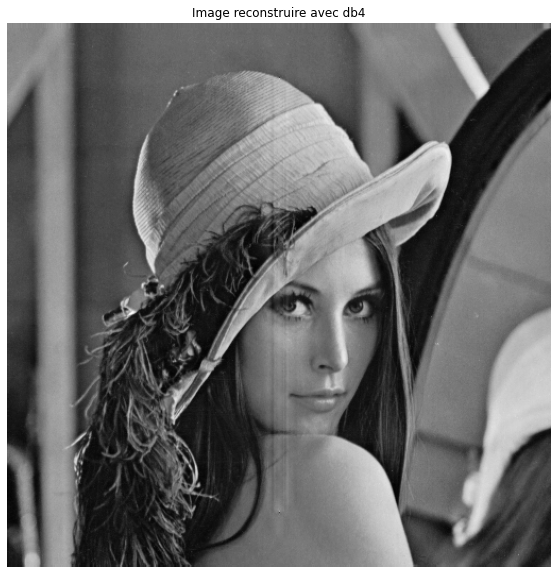

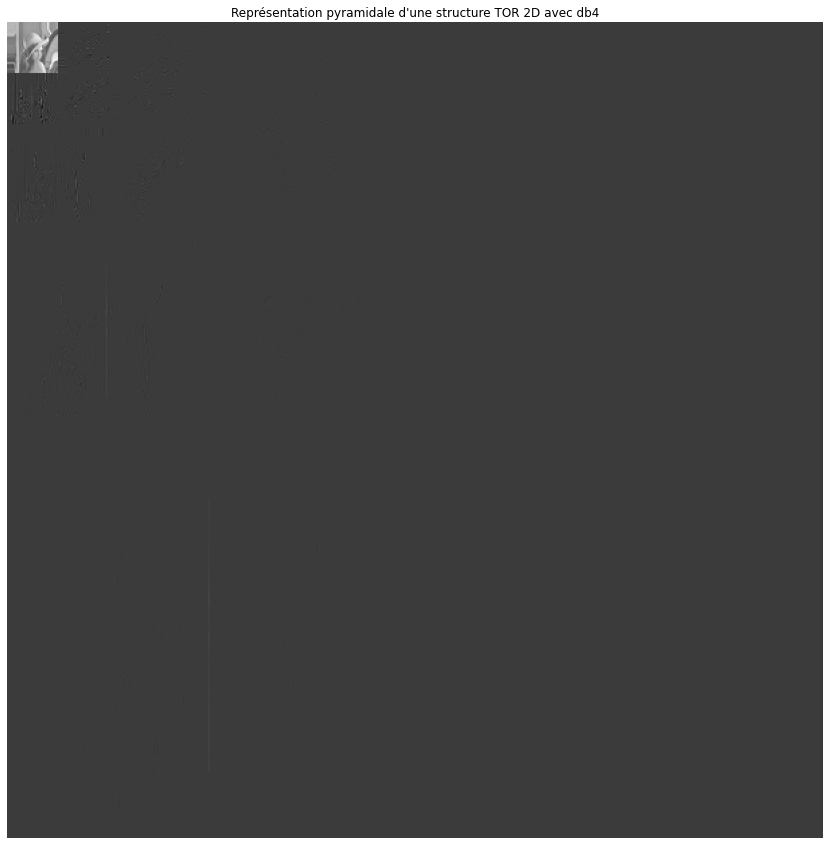

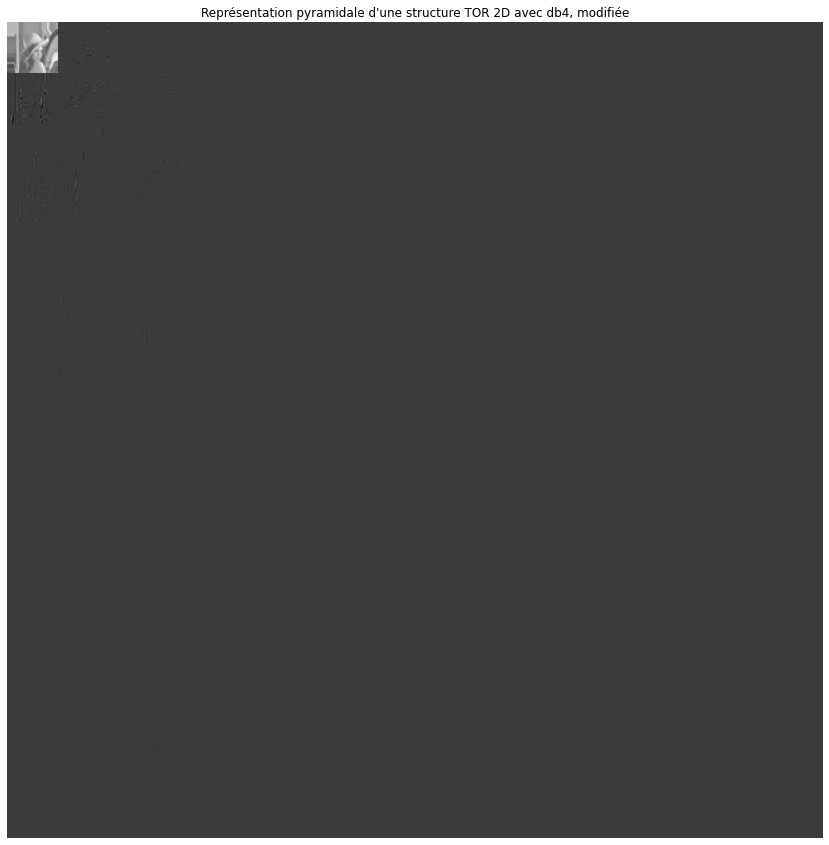

In [324]:
# Correction de la TOR avec db4 et reconstruction image
line_coord_r = [0.5, 0.1, 0.5, 0.9]
delta = 0.004

lenna_r = plt.imread('Lenna_r.tif')
coeffs_db4_r = pywt.wavedec2(lenna_r, pywt.Wavelet('db4') , level=4)

coeffs = set_to_zero2(coeffs_db4_r, delta, line_coord_r, "v")
img_rec_db4 = pywt.waverec2(coeffs, pywt.Wavelet('db4'))
plt.imshow(img_rec_db4, cmap="gray")
plt.title("Image reconstruire avec db4")
plt.axis("off")
wave2gray(coeffs_db4_r, text=" avec db4")
wave2gray(coeffs, text=" avec db4, modifiée")

<div class="alert alert-block alert-info">

### 2.2. Effet du type d’ondelette (4 pts)
</div>
<div class="alert alert-block alert-warning">
2.2.1. Effectuez le même traitement qu’à la section précédente avec l’ondelette de Haar. Ajustez les paramètres à votre disposition.
</div>

(-0.5, 511.5, 511.5, -0.5)

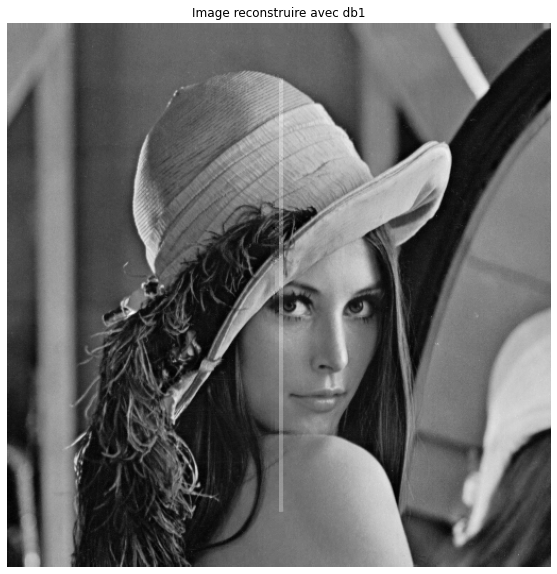

In [338]:
# Correction de la TOR avec Haar et reconstruction image
delta = 0.0085
coeffs_db1_r = pywt.wavedec2(lenna_r, pywt.Wavelet('db1') , level=2)

coeffs = set_to_zero2(coeffs_db1_r, delta, line_coord_r, "v")
img_rec_db1 = pywt.waverec2(coeffs, pywt.Wavelet('db1'))
plt.imshow(img_rec_db1, cmap="gray")
plt.title("Image reconstruire avec db1")
plt.axis("off")
#wave2gray(coeffs_db4_r, text=" avec db1")
#wave2gray(coeffs, text=" avec db1, modifiée")

<div class="alert alert-block alert-warning">
2.2.2. Effectuez le même traitement qu’à la section précédente avec l’ondelette sym6. Ajustez les paramètres à votre disposition. </div>

(-0.5, 511.5, 511.5, -0.5)

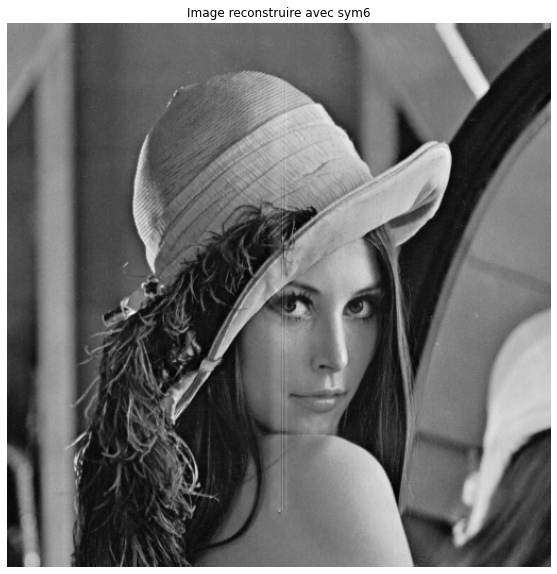

In [272]:
# Correction de la TOR avec Sym6 et reconstruction image
delta = 0.0075
coeffs_sym6_r = pywt.wavedec2(lenna_r, pywt.Wavelet('sym6') , level=3)

coeffs = set_to_zero2(coeffs_sym6_r, delta, line_coord_r, "v")
img_rec_sym6 = pywt.waverec2(coeffs, pywt.Wavelet('sym6'))
plt.imshow(img_rec_sym6, cmap="gray")
plt.title("Image reconstruire avec sym6")
plt.axis("off")
#wave2gray(coeffs_sym6_r, text=" avec sym6")
#wave2gray(coeffs, text=" avec sym6, modifiée")

<div class="alert alert-block alert-warning">
2.2.3. Commentez les résultats obtenus. </div>

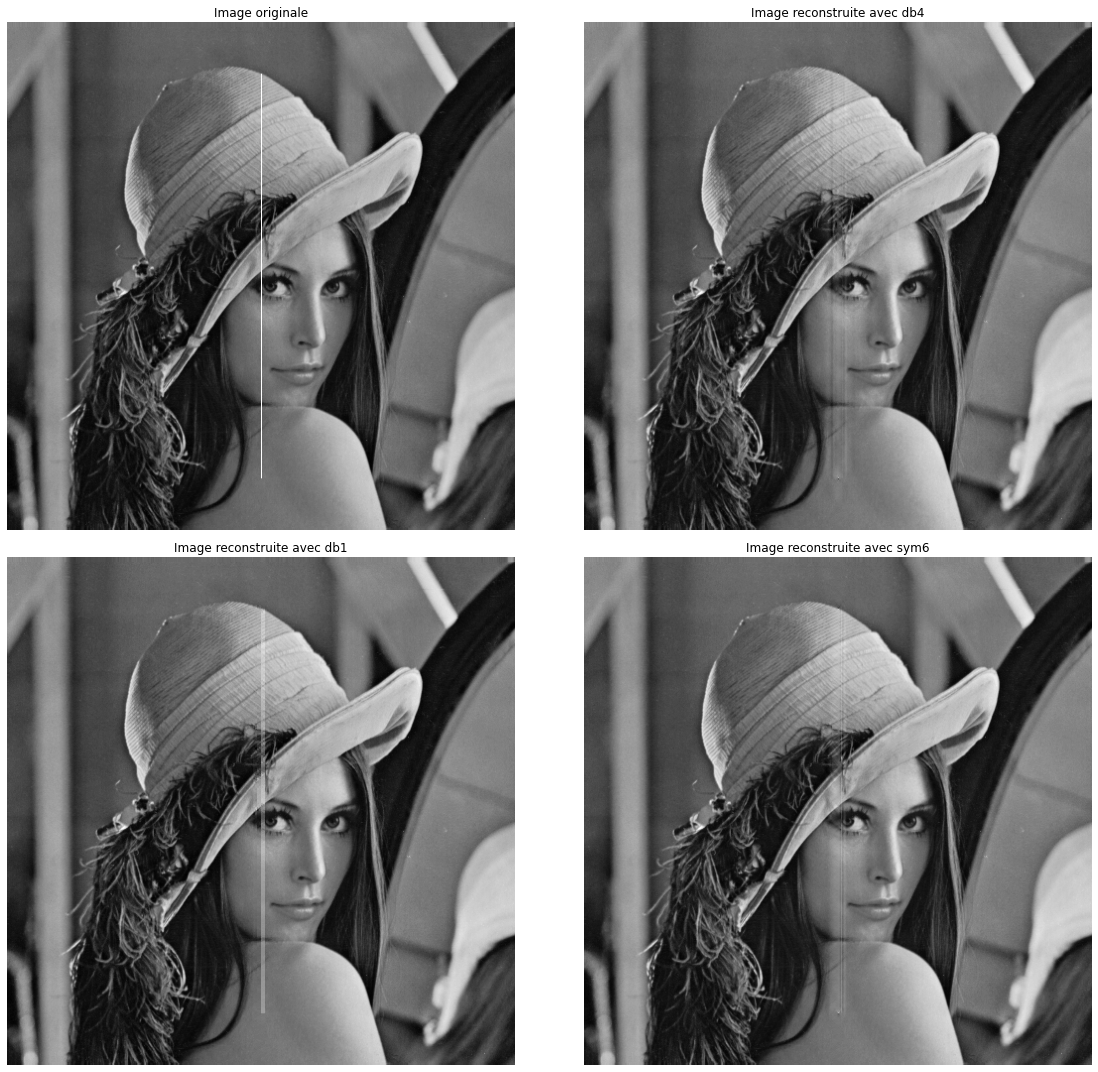

In [339]:
fig, axs = plt.subplots(2, 2, figsize=(17,15))
axs[0,0].imshow(lenna_r, cmap="gray")
axs[0,0].set_title("Image originale")
axs[0,0].axis("off")
axs[0,1].imshow(img_rec_db4, cmap="gray")
axs[0,1].set_title("Image reconstruite avec db4")
axs[0,1].axis("off")
axs[1,0].imshow(img_rec_db1, cmap="gray")
axs[1,0].set_title("Image reconstruite avec db1")
axs[1,0].axis("off")
axs[1,1].imshow(img_rec_sym6, cmap="gray")
axs[1,1].set_title("Image reconstruite avec sym6")
axs[1,1].axis("off")
plt.tight_layout()

<div class="alert alert-block alert-success"> 
D'abord, il faut choisir un nombre de niveaux suffisamment élevé. Si on est trop bas, on ne réussira pas à faire disparaître la ligne. Si on est trop élevé, la reconstruction sera bruitée. Ensuite, la valeur de delta permet de choisir la taille de la ligne que l'on souhaite supprimer dans la TOR (mise à 0). Si delta a une valeur trop petite, la ligne sera toujours apparente dans la reconstruction. Si elle est trop grande, on va supprimer des détails autour de la ligne, sans pour autant améliorer le résultat directement sur la ligne. 

Ensuite, on remarque que les 3 types d'ondelettes donnent des résultats assez différents. Le pire résultat a été obtenu avec db1. db4 et sym6 donnent des résultats similaires, mais sym6 est un peu plus lisse. </div>

<div class="alert alert-block alert-info">

### 2.3. Effet de l’orientation du défaut (2 pts)
</div>
<div class="alert alert-block alert-warning">
2.3.1. En utilisant l’ondelette sym6, traitez l’image Lenna_s.tif en ajustant de nouveau les paramètres à votre disposition.

<b>Remarque :</b> Les extrémités du défaut affectant l’image Lenna_s.tif ont les coordonnées suivantes : A = (0.1, 0.4) et B = (0.9, 0.6).
</div>

(-0.5, 511.5, 511.5, -0.5)

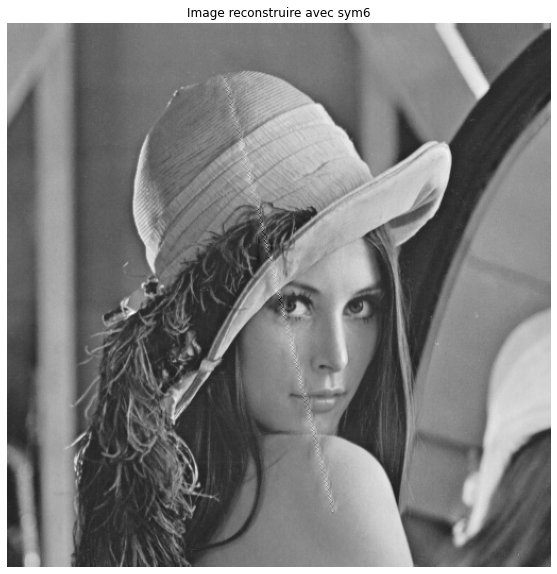

In [340]:
# Correction de la TOR avec Sym6 et reconstruction image
line_coord_s = [0.4, 0.1, 0.6, 0.9]
lenna_s = plt.imread("lenna_s.tif")
delta = 0.0075
coeffs_sym6_s = pywt.wavedec2(lenna_s, pywt.Wavelet('sym6') , level=3)

coeffs = coeffs_sym6_s
coeffs = set_to_zero2(coeffs, delta, line_coord_s, "v")
#coeffs = set_to_zero2(coeffs, delta, line_coord_s, "h")
#coeffs = set_to_zero2(coeffs, delta, line_coord_s, "d")

img_rec_lenna = pywt.waverec2(coeffs, pywt.Wavelet('sym6'))
plt.imshow(img_rec_lenna, cmap="gray")
plt.title("Image reconstruire avec sym6")
plt.axis("off")
#wave2gray(coeffs_sym6_s, text=" avec sym6")
#wave2gray(coeffs, text=" avec sym6, modifiée")

<div class="alert alert-block alert-warning">
2.3.2. Comparez les résultats à ceux obtenus avec l’image Lenna_r.tif. Commentez. </div>

<div class="alert alert-block alert-success"> 
La correction obtenue dans le cas de la ligne diagonale est plus visible que dans le cas vertical. En effet, la correction verticale a des couleurs plus uniformes, ce qui fait en sorte qu'elle se fond bien dans le reste de l'image. Par contre, la ligne diagonale a une intensité plus élevée (blanc) en damier. </div>

<div class="alert alert-block alert-info">

### 2.4. Effet du type d’image (2 pts)
</div>
<div class="alert alert-block alert-warning">
2.4.1 Toujours avec l’ondelette sym6, traitez l’image phare_s.tif, dont le défaut a les mêmes caractéristiques que celui présent dans l’image Lenna_s.tif.

</div>

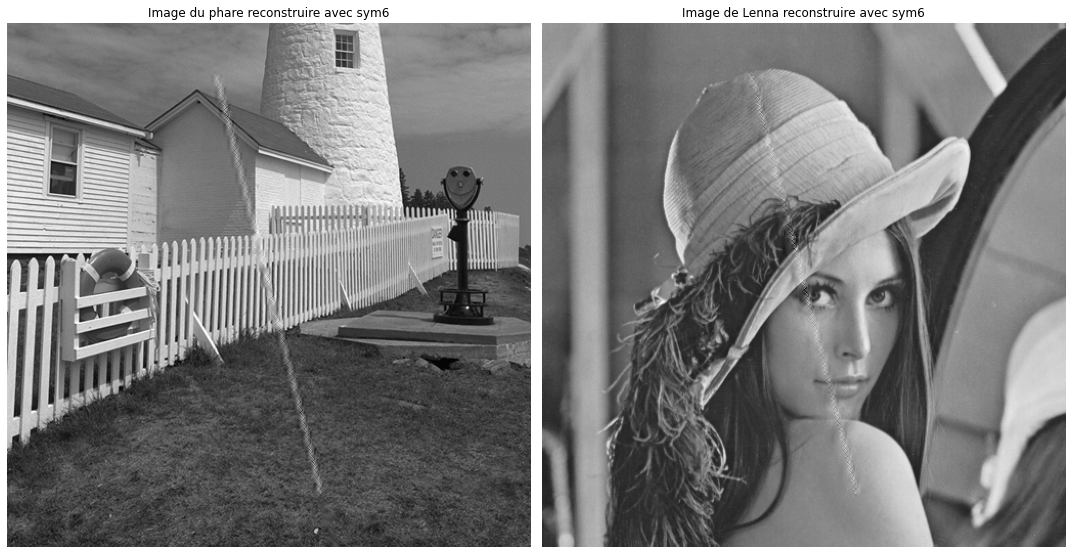

In [341]:
# Correction de la TOR avec Sym6 et reconstruction image
line_coord_s = [0.4, 0.1, 0.6, 0.9]
phare_s = plt.imread("phare_s.tif")
delta = 0.0075
coeffs_sym6_s = pywt.wavedec2(phare_s, pywt.Wavelet('sym6') , level=2)

coeffs = coeffs_sym6_s
coeffs = set_to_zero2(coeffs, delta, line_coord_s, "v")
#coeffs = set_to_zero2(coeffs, delta, line_coord_s, "h")
#coeffs = set_to_zero2(coeffs, delta, line_coord_s, "d")

coeffs = set_to_zero2(coeffs, delta, line_coord_s, "h")
img_rec_phare = pywt.waverec2(coeffs, pywt.Wavelet('sym6'))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.imshow(img_rec_phare, cmap="gray")
ax1.set_title("Image du phare reconstruire avec sym6")
ax1.axis("off")
ax2.imshow(img_rec_lenna, cmap="gray")
ax2.set_title("Image de Lenna reconstruire avec sym6")
ax2.axis("off")
plt.tight_layout()

<div class="alert alert-block alert-warning">
2.4.2. Que constatez-vous ? Interprétez votre résultat en vous appuyant différences entre les caractéristiques locales des images Lenna_s.tif et phare_s.tif. </div>

<div class="alert alert-block alert-success"> 
On remarque que ce type de correction d'image n'est pas approprié à tout type d'image. Dans ce cas-ci, la ligne dans l'image du phare est encore clairement visible puisqu'elle traverse des zones d'intensité très variable (fort contraste). Dans le cas de l'image de Lenna, la ligne traverse des zones de luminosité semblables, ce qui la rend moins visible. Par contre, dans les 2 cas, l'effet de la correction de la ligne est très semblable par rapport à la ligne originale.
</div>